# Market Basket Analysis using Eclat Algorithm

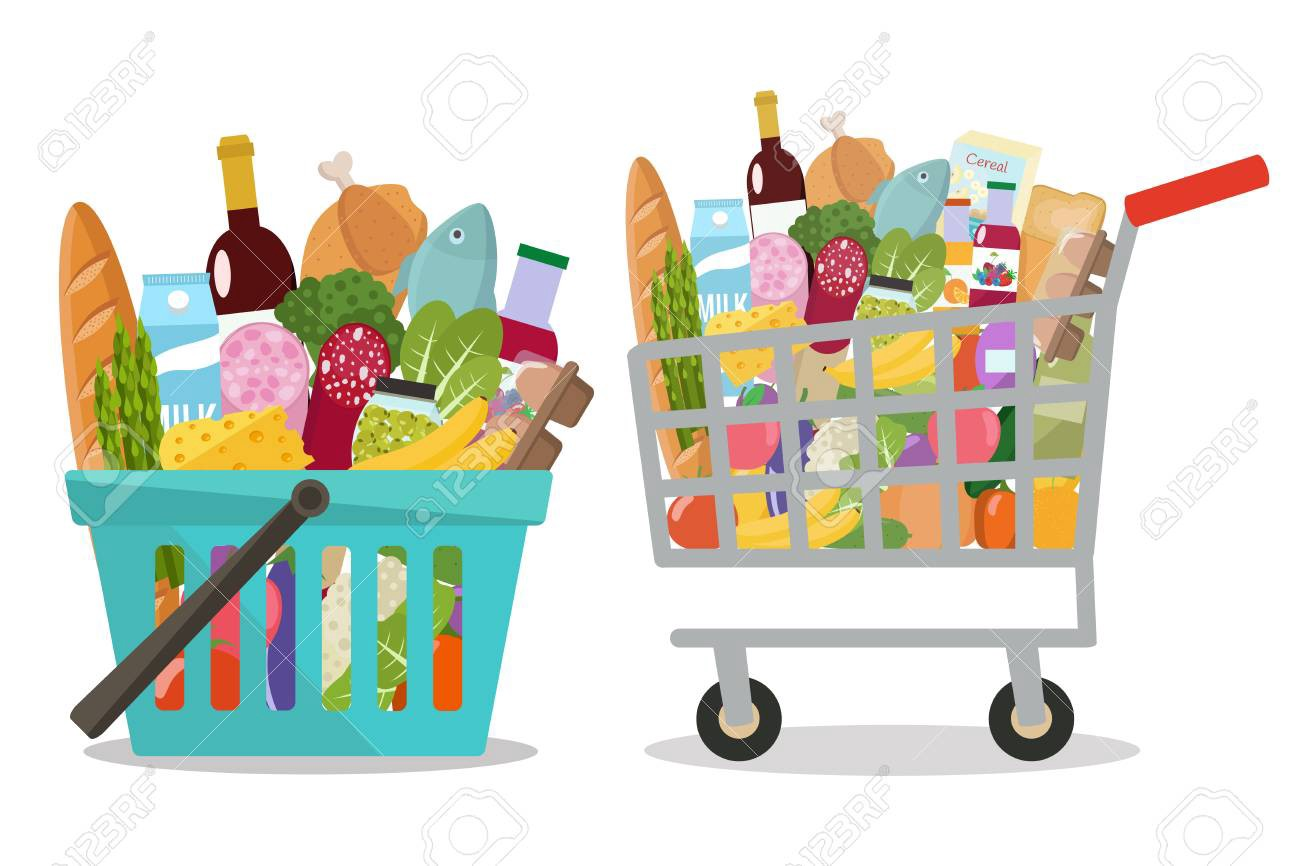

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the Dataset

In [2]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(7501, 20)

# Wordplot

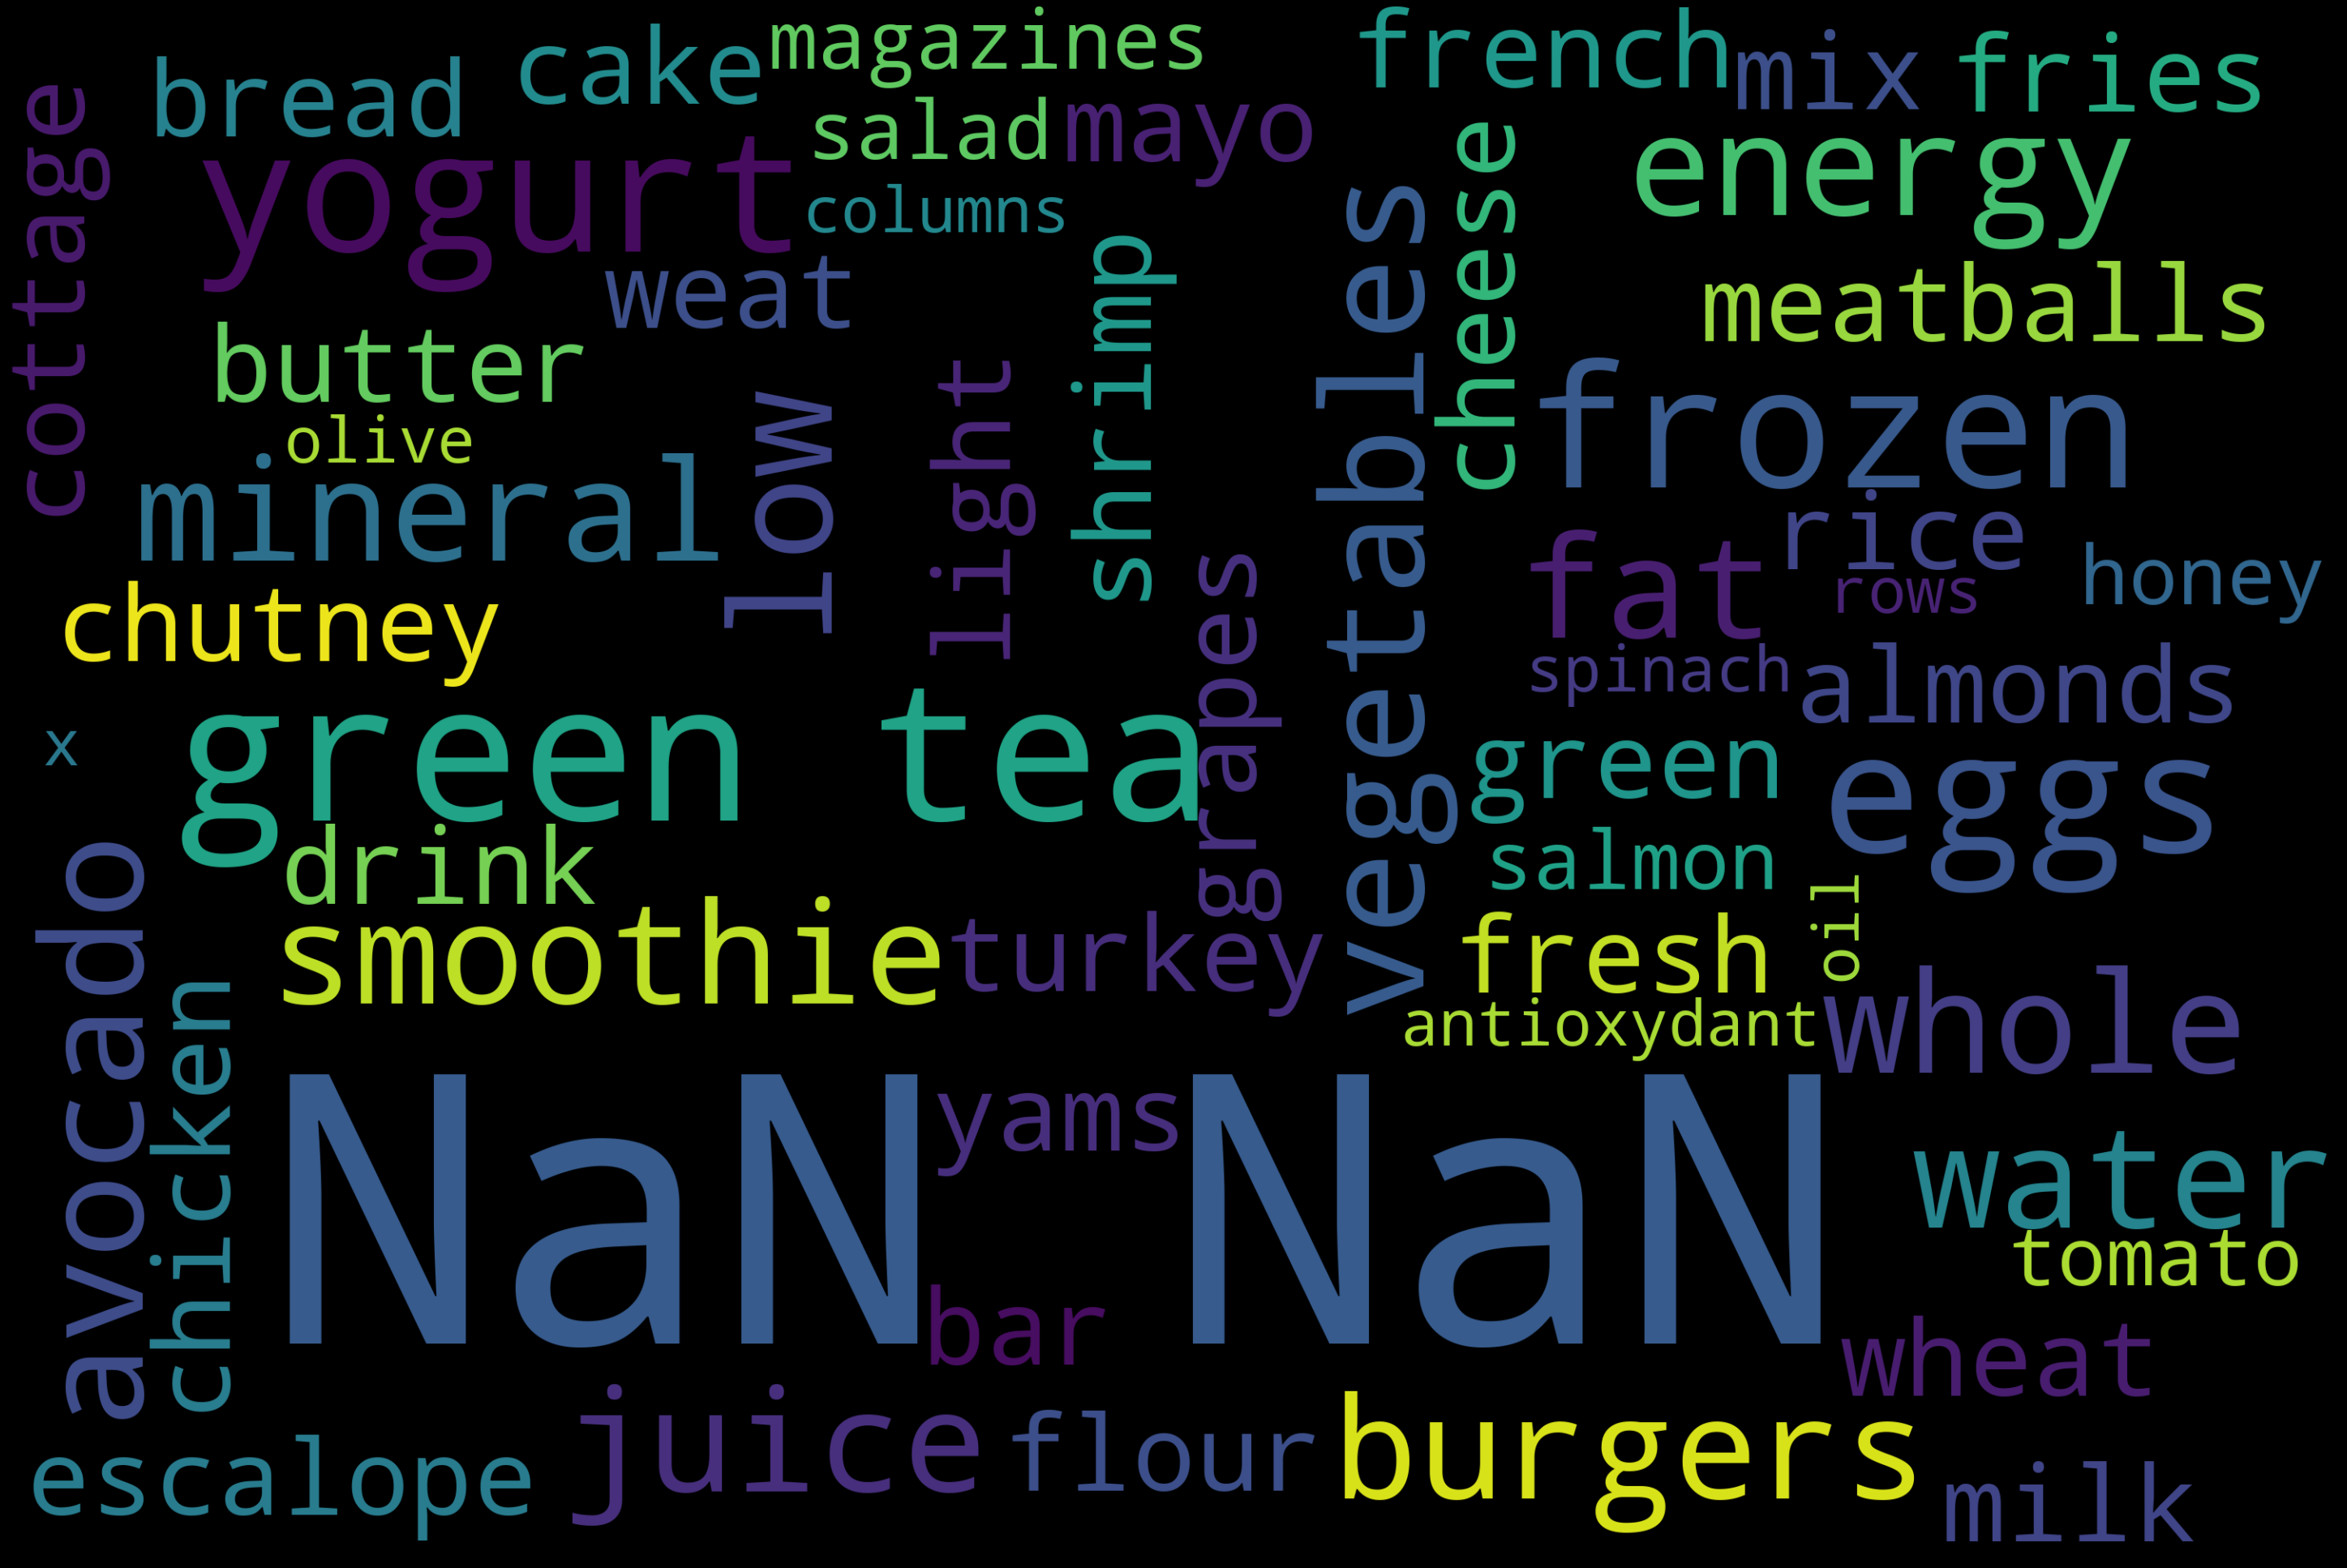

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = dataset
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Storing in a List

In [6]:

transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [7]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

# Building Eclat model 

In [8]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_length = 2, max_length = 2)

# Storing the Rules

In [9]:
results = list(rules)

In [10]:
results

[RelationRecord(items=frozenset({'almonds'}), support=0.020397280362618318, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'almonds'}), confidence=0.020397280362618318, lift=1.0)]),
 RelationRecord(items=frozenset({'antioxydant juice'}), support=0.008932142381015865, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'antioxydant juice'}), confidence=0.008932142381015865, lift=1.0)]),
 RelationRecord(items=frozenset({'asparagus'}), support=0.004666044527396347, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'asparagus'}), confidence=0.004666044527396347, lift=1.0)]),
 RelationRecord(items=frozenset({'avocado'}), support=0.03332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'avocado'}), confidence=0.03332888948140248, lift=1.0)]),
 RelationRecord(items=frozenset({'babies food'}), support=0.004532728969470737, ordered_statistics=[OrderedSta

# Storing the Rules into Dataframe

In [11]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
df = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support'])

IndexError: tuple index out of range

In [ ]:
df.shape

In [ ]:
df

# Making a New Column for the New Rules

In [ ]:
df["New Rules"] = df["Left Hand Side"].map(str) + " + " + df["Right Hand Side"]

In [ ]:
df

# Left Side Word Plot

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df['Left Hand Side']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Right Side Word Plot

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df['Right Hand Side']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Support Plot

In [ ]:
import plotly.express as px

fig = px.histogram(df, y="New Rules",x="Support",title= "Support")
fig.show()

In [ ]:
fig = px.histogram(df.nlargest(n=9, columns = 'Support'), y="New Rules",x="Support",title= "Support")
fig.show()

# Initially We have Raw Groceries Data, but After Applying ECLAT Algorithm we Now have 9 New rules That will Most-likely be Sold Together and Fast 